<h1 align="center"> Statistics and Financial Data Analysis </h1>



In [2]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as m
import scipy as sp
import datetime
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2019, 1, 31)
symbols = ['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20','DGS30']
USyields = pd_data.DataReader(['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20','DGS30'], 'fred', start, end)
USYieldsRtn = USyields.diff().dropna()
USYieldsRtn

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2001-01-03,-0.18,-0.14,-0.07,0.05,0.10,0.18,0.21,0.22,0.16,0.14
2001-01-04,-0.32,-0.24,-0.22,-0.15,-0.14,-0.12,-0.11,-0.11,-0.06,-0.05
2001-01-05,-0.25,-0.22,-0.22,-0.21,-0.21,-0.16,-0.14,-0.10,-0.06,-0.03
2001-01-08,0.07,0.05,0.01,-0.02,-0.02,-0.01,0.01,0.01,0.02,0.01
2001-01-09,0.05,0.08,0.10,0.10,0.10,0.08,0.04,0.04,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...
2019-01-25,0.02,0.01,0.02,0.04,0.04,0.04,0.04,0.04,0.03,0.02
2019-01-28,0.03,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.01,0.00,0.00
2019-01-29,0.00,0.00,0.00,-0.04,-0.04,-0.03,-0.04,-0.03,-0.02,-0.02


In [3]:
USyields2= USyields['2010-01-02':'2015-01-31']
USyields2.head()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2010-01-04,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


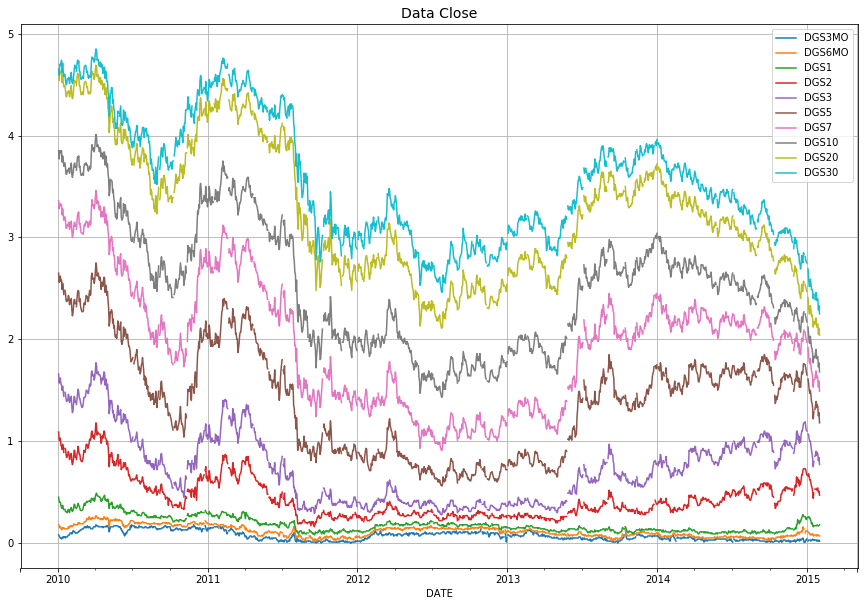

In [4]:
USyields2.plot(figsize = (15, 10), grid = True)
plt.title('Data Close', fontsize=14)
plt.show()

<Figure size 576x432 with 0 Axes>

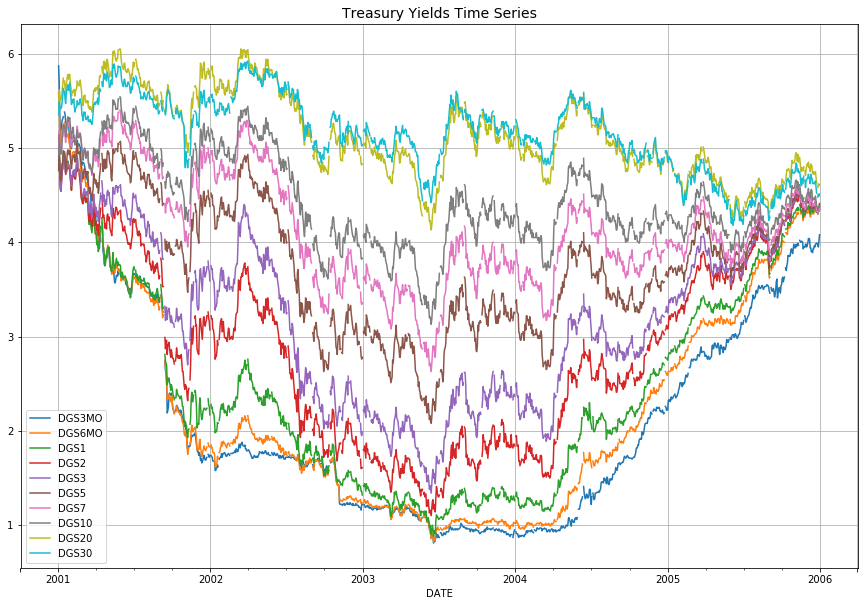

In [5]:
plt.figure(1, figsize=(8,6))
USyields['2001-01-01':'2005-12-31'].plot(figsize = (15, 10), grid = True)
plt.title('Treasury Yields Time Series', fontsize=14)
plt.savefig("TreasuryYields")

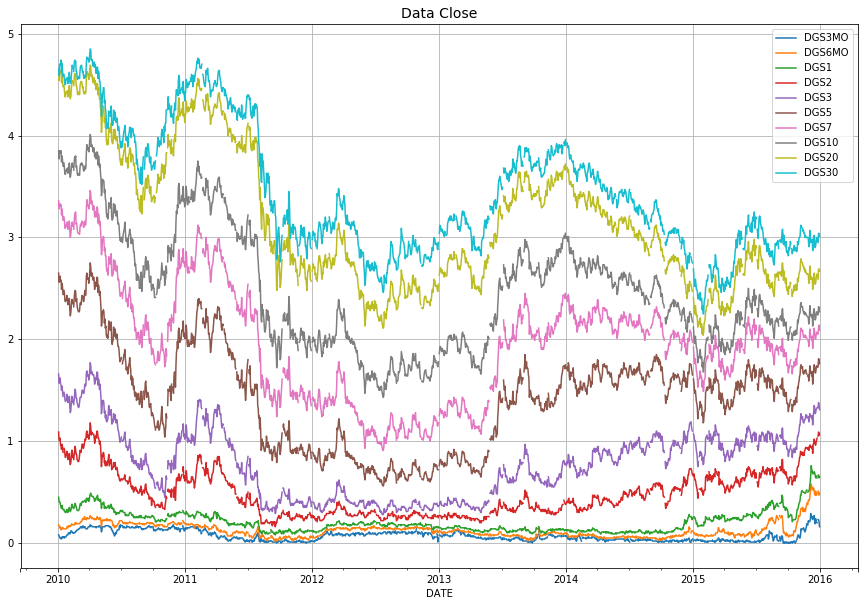

In [6]:
USyields['2010-01-02':'2015-12-31'].plot(figsize = (15, 10), grid = True)
plt.title('Data Close', fontsize=14)
plt.show()

In [7]:
yieldCurve1 = np.zeros(10)
yieldCurve2 = np.zeros(10)
yieldCurve3 = np.zeros(10)
yieldMean = np.zeros(10)

yT = USyields['2001-01-01':'2005-12-31'].dropna()

for i in range(10):
    yieldCurve1[i] = yT.loc['2001-01-02'][i]   
    yieldCurve2[i] = yT.loc['2002-12-04'][i]   
    yieldCurve3[i] = yT.loc['2005-12-30'][i]  
    yieldMean[i] = yT.iloc[i].mean()
    
mat = [0.3,0.5,1,2,3,5,7,10,20,30]

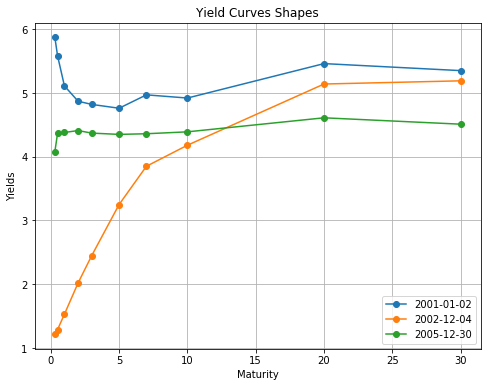

In [8]:
plt.figure(1, figsize=(8,6))
plt.plot(mat, yieldCurve1, marker ='o', label = '2001-01-02')
plt.plot(mat, yieldCurve2, marker ='o', label = '2002-12-04')
plt.plot(mat, yieldCurve3, marker ='o', label = '2005-12-30')
plt.legend()
plt.title("Yield Curves Shapes")
plt.xlabel("Maturity")
plt.ylabel("Yields")
plt.grid()
plt.savefig("Yield Curves")

In [9]:
scale_function = lambda x:(x-x.mean())/(x.max()-x.min())

data1 = USyields['2001-01-01':'2005-12-31']
data1 = data1.diff().dropna()

In [10]:
yieldChangeMean = np.zeros(10)
for i in range(10):
    yieldChangeMean[i] = data1.iloc[i].mean()
    

In [11]:
scale_data = data1.apply(scale_function).dropna()
scale_data.head()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2001-01-03,-0.386617,-0.363321,-0.151678,0.097125,0.178147,0.349542,0.432766,0.482310,0.415505,0.267855
2001-01-04,-0.690965,-0.626479,-0.485011,-0.280233,-0.242906,-0.227381,-0.220295,-0.235082,-0.148597,-0.090636
2001-01-05,-0.538791,-0.573848,-0.485011,-0.393441,-0.365713,-0.304304,-0.281520,-0.213343,-0.148597,-0.052900
2001-01-08,0.156861,0.136679,0.026100,-0.034950,-0.032380,-0.015843,0.024603,0.025788,0.056531,0.022572
2001-01-09,0.113383,0.215626,0.226100,0.191465,0.178147,0.157234,0.085827,0.091005,0.030890,0.022572


<Figure size 576x432 with 0 Axes>

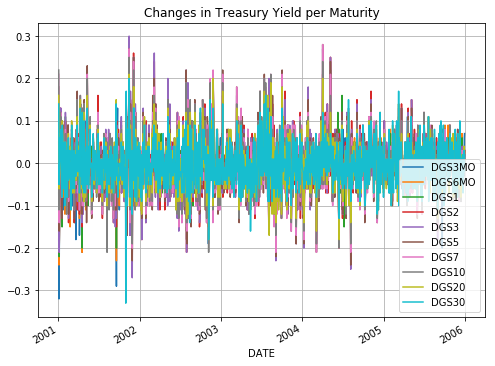

In [12]:
plt.figure(1, figsize=(8,6))
data1.plot(figsize=(8,6))
plt.title("Changes in Treasury Yield per Maturity")
plt.grid()
plt.savefig("ChangesYield")

In [13]:
data1.corr()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS3MO,1.000000,0.778884,0.590073,0.423893,0.393075,0.355049,0.307006,0.284348,0.215542,0.175523
DGS6MO,0.778884,1.000000,0.847988,0.673436,0.630754,0.578333,0.528785,0.493625,0.411062,0.334880
DGS1,0.590073,0.847988,1.000000,0.868197,0.826127,0.775102,0.732362,0.697064,0.616970,0.502430
DGS2,0.423893,0.673436,0.868197,1.000000,0.970324,0.917696,0.882556,0.843803,0.766421,0.626203
DGS3,0.393075,0.630754,0.826127,0.970324,1.000000,0.953792,0.921489,0.889024,0.815440,0.679666
DGS5,0.355049,0.578333,0.775102,0.917696,0.953792,1.000000,0.972980,0.952156,0.895104,0.766849
DGS7,0.307006,0.528785,0.732362,0.882556,0.921489,0.972980,1.000000,0.978324,0.941848,0.821792
DGS10,0.284348,0.493625,0.697064,0.843803,0.889024,0.952156,0.978324,1.000000,0.959349,0.855934
DGS20,0.215542,0.411062,0.616970,0.766421,0.815440,0.895104,0.941848,0.959349,1.000000,0.895758
DGS30,0.175523,0.334880,0.502430,0.626203,0.679666,0.766849,0.821792,0.855934,0.895758,1.000000


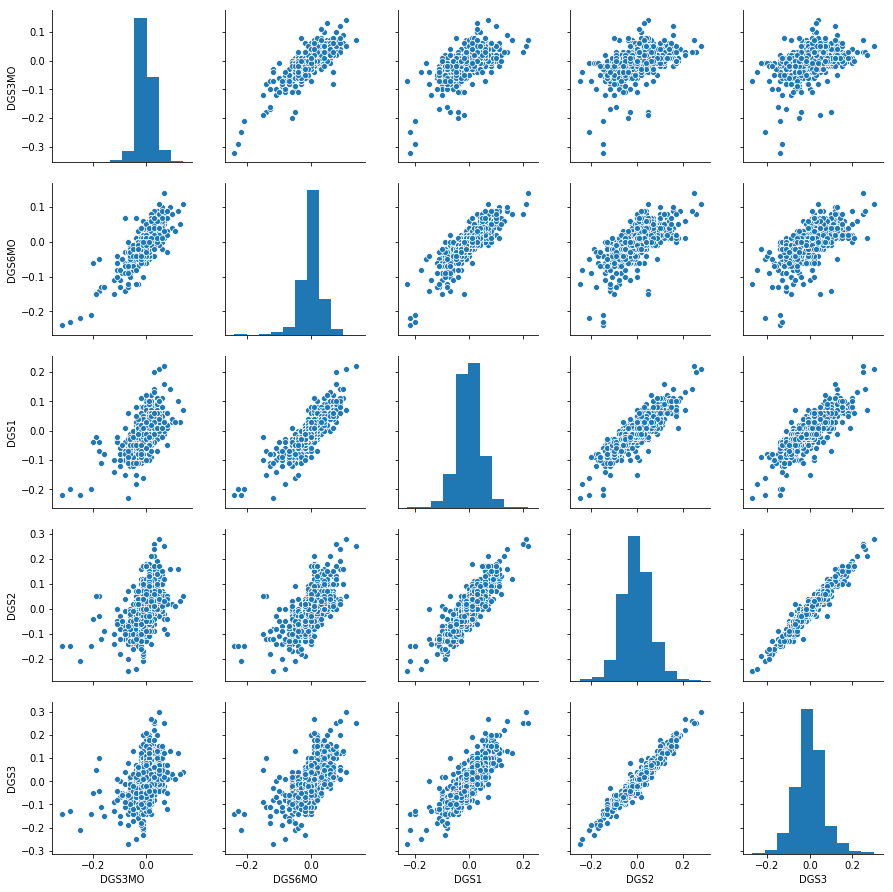

In [14]:
import seaborn as sns
sns.pairplot(data1[['DGS3MO','DGS6MO','DGS1','DGS2','DGS3']])  


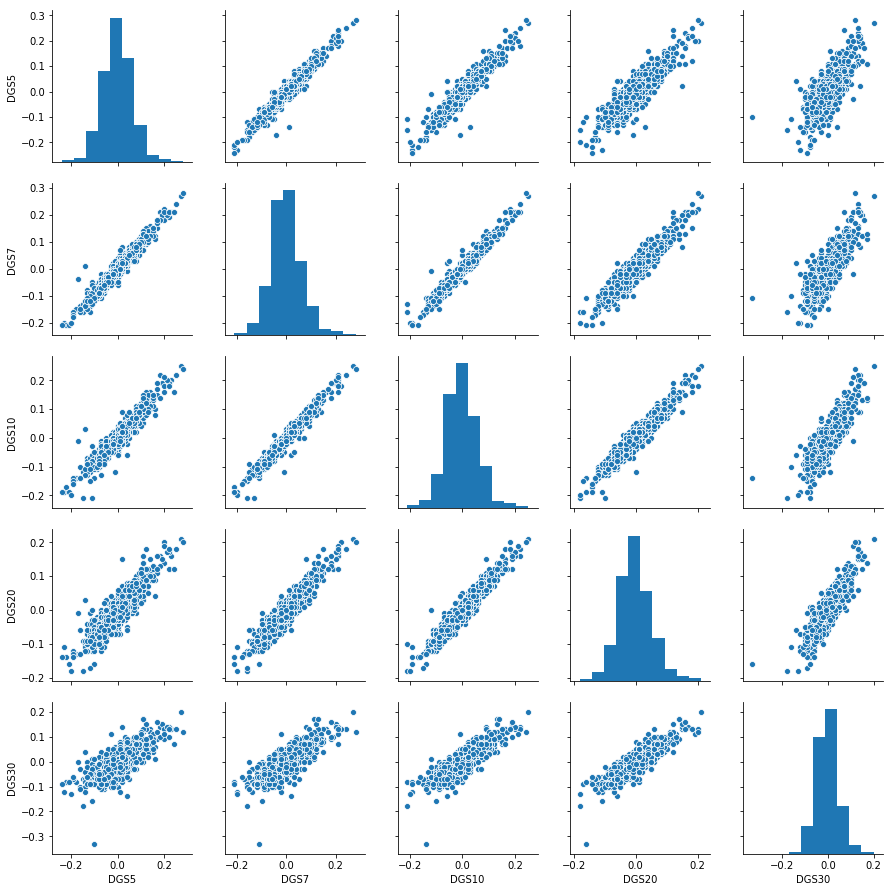

In [15]:
sns.pairplot(data1[['DGS5','DGS7','DGS10','DGS20','DGS30']])  

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(data1)

print(np.sum(pca.explained_variance_ratio_))

1.0000000000000002


In [17]:
temp = np.linspace(1,10,10)
len(pca.explained_variance_ratio_)

10

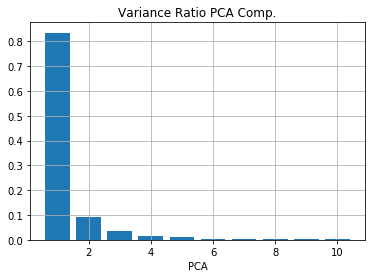

In [18]:
plt.bar(temp, pca.explained_variance_ratio_)
plt.title("Variance Ratio PCA Comp.")
plt.xlabel('PCA')
plt.grid()
plt.savefig("PCA_Var_Ratio")

In [19]:
pca = PCA(n_components = 3)
pca.fit(data1)
print(np.sum(pca.explained_variance_ratio_))

0.9602647401186162


array([[ 0.08578374,  0.13713112,  0.23240495,  0.37098125,  0.40328448,
         0.40957703,  0.39602489,  0.36776963,  0.31302466,  0.24845662],
       [-0.43235464, -0.4299252 , -0.40958164, -0.28170423, -0.17470016,
         0.02971695,  0.16393851,  0.2340053 ,  0.33587391,  0.39404384],
       [-0.56810508, -0.3490198 , -0.09559655,  0.35648711,  0.35595623,
         0.13759274,  0.01309489, -0.09739724, -0.21241016, -0.46776881]])

In [21]:
pca.explained_variance_

array([0.02592351, 0.00280513, 0.00109178])

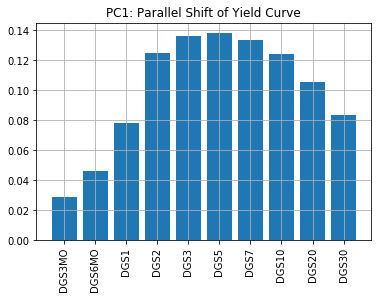

In [22]:
s1 = pca.components_[0].sum()
w1 = pca.components_[0]/s1
plt.bar(symbols, w1)
plt.xticks(rotation=90);
plt.title("PC1: Parallel Shift of Yield Curve")
plt.grid()
plt.savefig("PCA1Eigen_1")

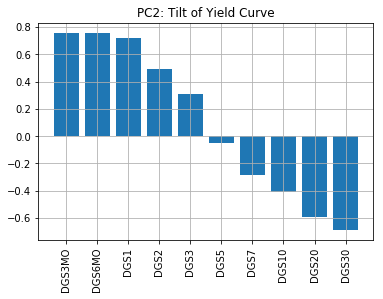

In [23]:
s2 = pca.components_[1].sum()
w2 = pca.components_[1]/s2
plt.bar(symbols, w2)
plt.xticks(rotation=90);
plt.title("PC2: Tilt of Yield Curve")
plt.grid()
plt.savefig("PCA2Eigen_1")

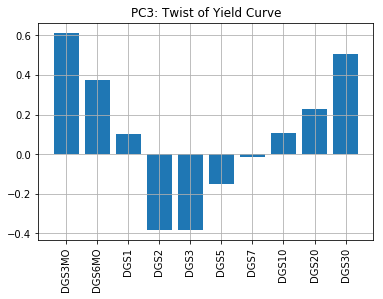

In [24]:
s3 = pca.components_[2].sum()
w3 = pca.components_[2]/s3
plt.bar(symbols, w3)
plt.xticks(rotation=90);
plt.title("PC3: Twist of Yield Curve")
plt.grid()
plt.savefig("PCA3Eigen_1")

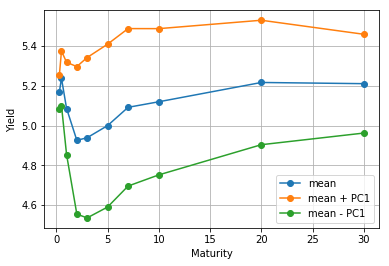

In [25]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[0], marker = 'o', label = "mean + PC1")
plt.plot(mat,yieldMean-pca.components_[0],marker = 'o', label = "mean - PC1")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
plt.savefig('Parallel')

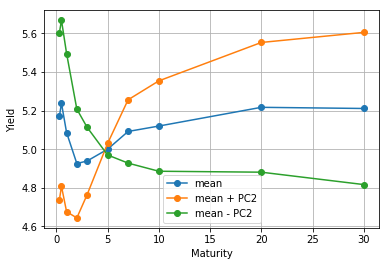

In [26]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[1], marker = 'o', label = "mean + PC2")
plt.plot(mat,yieldMean-pca.components_[1],marker = 'o', label = "mean - PC2")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
plt.savefig('Tilt')

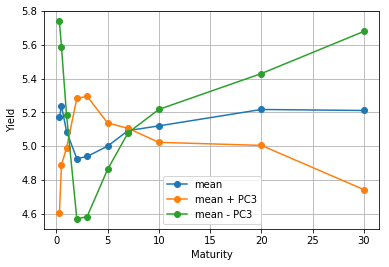

In [27]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[2], marker = 'o', label = "mean + PC3")
plt.plot(mat,yieldMean-pca.components_[2], marker = 'o',label = "mean - PC3")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
plt.savefig('Twist')

Time series of PC's 
==

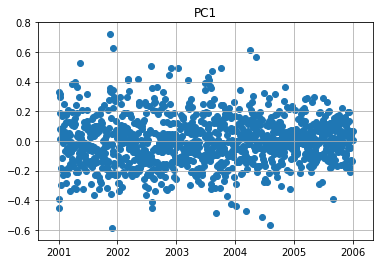

In [28]:
tempPC1 = np.dot(data1,pca.components_[0])
plt.scatter(data1.index,tempPC1)
plt.title("PC1")
plt.grid()
plt.savefig("PC1_timeSeries")

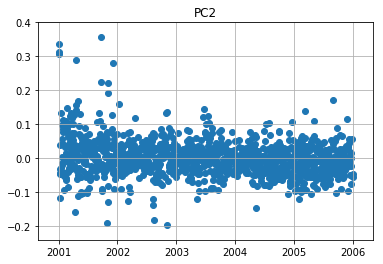

In [29]:
tempPC2 = np.dot(data1,pca.components_[1])
plt.scatter(data1.index,tempPC2)
plt.title("PC2")
plt.grid()
plt.savefig("PC2_timeSeries")

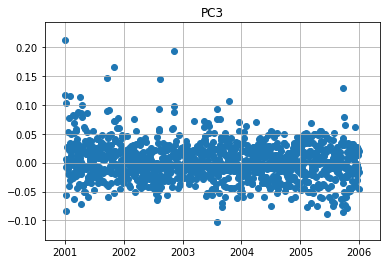

In [30]:
tempPC3 = np.dot(data1,pca.components_[2])
plt.scatter(data1.index,tempPC3)
plt.title("PC3")
plt.grid()
plt.savefig("PC3_timeSeries")

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm 

def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(10,10))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Data")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Data")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    #logData = np.floor(np.log(len(data)))
    ljbox_test = sm.stats.acorr_ljungbox(data,10)#package version
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    
    ax6.plot(data*data)
    ax6.grid()
    ax6.set_title("Data Sqr")
    
    plt.tight_layout()

In [32]:
# Reject Unit Root
test = adfuller(tempPC1, maxlag = 5)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -25.743957
p-value: 0.000000
Critical Values:i/
	1%: -3.44
	5%: -2.86
	10%: -2.57


In [33]:
# Kpss test supports stationarity
num = len(tempPC1)
maxLag = np.log(num)
test = kpss(tempPC1, lags = int(maxLag),regression ='ct') 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.027150
p-value: 0.100000
Critical Values:
	10%: 0.12
	5%: 0.15
	2.5%: 0.18
	1%: 0.22


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [34]:
?kpss

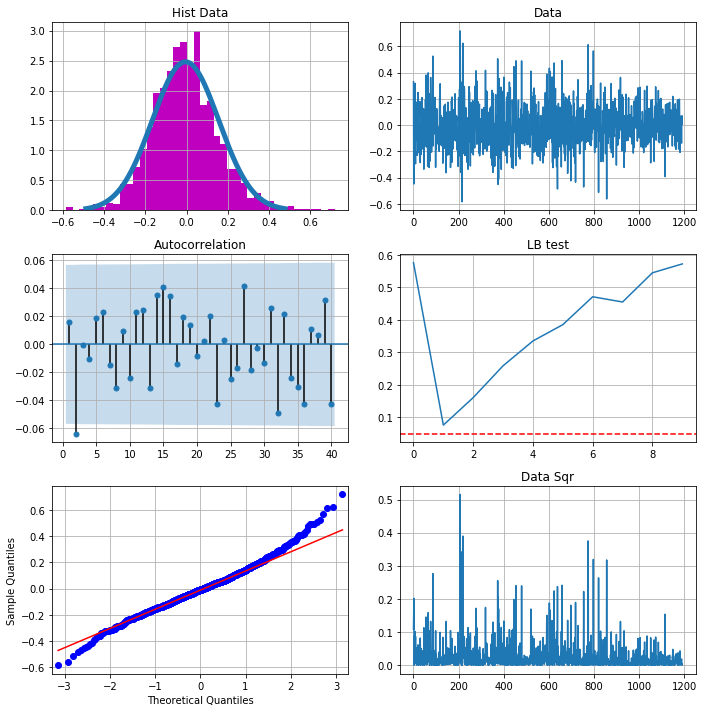

In [45]:
plot_diagnosticsTight3(tempPC1)

In [35]:
PC1 = pca.components_[0]
PC2 = pca.components_[1]
PC3 = pca.components_[2]


In [36]:
myList = [PC1,PC2,PC3, mat]
names = ['PC1','PC2','PC3','Maturity']
myDict = dict(zip(names, myList))
df = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df = df.set_index('Maturity')

In [37]:
df.head(10)

,PC1,PC2,PC3
Maturity,,,
0.3,0.085784,-0.432355,-0.568105
0.5,0.137131,-0.429925,-0.349020
1.0,0.232405,-0.409582,-0.095597
2.0,0.370981,-0.281704,0.356487
3.0,0.403284,-0.174700,0.355956
5.0,0.409577,0.029717,0.137593
7.0,0.396025,0.163939,0.013095
10.0,0.367770,0.234005,-0.097397
20.0,0.313025,0.335874,-0.212410


In [38]:
PC1*0.01*1000

array([0.85783736, 1.37131118, 2.32404947, 3.70981247, 4.03284485,
       4.09577035, 3.96024887, 3.6776963 , 3.13024656, 2.48456618])

In [39]:
# 1 standard deviation PC1,PC2,PC3
std = np.sqrt(pca.explained_variance_)

In [40]:
# Basis point move of PC1:
PC1Bps = PC1/std[0]
PC2Bps = PC2/std[1]
PC3Bps = PC3/std[2]

In [41]:
myList = [PC1Bps,PC2Bps,PC3Bps, mat]
names = ['PC1Bps','PC2Bps','PC3Bps','Maturity']
myDict = dict(zip(names, myList))
dfBps = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
dfBps = dfBps.set_index('Maturity')

In [42]:
dfBps.round()

,PC1Bps,PC2Bps,PC3Bps
Maturity,,,
0.3,1.0,-8.0,-17.0
0.5,1.0,-8.0,-11.0
1.0,1.0,-8.0,-3.0
2.0,2.0,-5.0,11.0
3.0,3.0,-3.0,11.0
5.0,3.0,1.0,4.0
7.0,2.0,3.0,0.0
10.0,2.0,4.0,-3.0
20.0,2.0,6.0,-6.0


In [52]:
RiskPortf = np.array([100,200,500,200,200, 1000,1000,1000,1000,1000])
RiskPortf=RiskPortf.astype(float)
myList = [RiskPortf, mat]
names = ['RiskPort','Maturity']
myDict = dict(zip(names, myList))
risk = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
risk = risk.set_index('Maturity')

In [53]:
risk

,RiskPort
Maturity,
0.3,100.0
0.5,200.0
1.0,500.0
2.0,200.0
3.0,200.0
5.0,1000.0
7.0,1000.0
10.0,1000.0
20.0,1000.0


In [68]:
pcRisk1 = risk['RiskPort']*dfBps['PC1Bps']
pcRisk1.sum()

12682.076908700446

In [67]:
pcRisk2 = risk['RiskPort']*dfBps['PC2Bps']
pcRisk2.sum()

13826.240760886154

In [66]:
pcRisk3 = risk['RiskPort']*dfBps['PC3Bps']
pcRisk3.sum()

-19938.601358217078